# Encoder-LSTM-Decoder Many2Many Predicter
This script predicts 4 bars on an input of 4 bars loaded from a MIDI file

In [1]:
import torch
from VAE.VAE_Reconstruct_TrainNEW import VAE
from LSTM.VAE_LSTM_Many2Many import LSTM_Many2Many
from loadModel import loadStateDict
from lstm_utils.predict import predict

lstm_path = 'checkpoints_many2many/m2m_wiki12up12down_h512.pth'
vae_path = '../VAE/checkpoints/dougmckenzie_tpby60.pth'
bars=8
temperature=0.7

#for gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#load models
lstm_model = LSTM_Many2Many(batch_size=1, seq_length=bars, 
             input_size=100, hidden_size=512)
vae_model = VAE()

#load weights
lstm_model = loadStateDict(lstm_model, lstm_path)
vae_model = loadStateDict(vae_model, vae_path)

# to device
lstm_model = lstm_model.double().to(device)
vae_model = vae_model.to(device)


--------GPU state dict restored, loaded into CPU--------


--------GPU data parallel model restored--------



INPUT


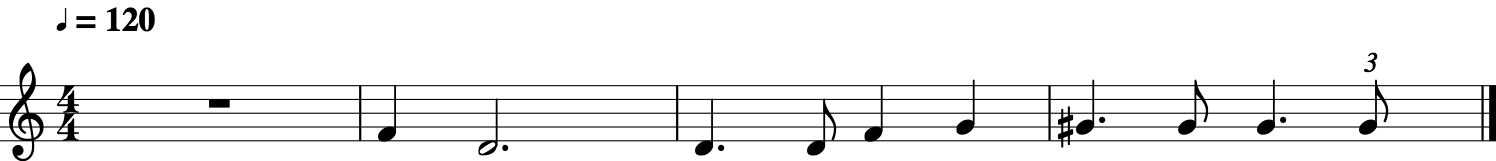

PREDICTION


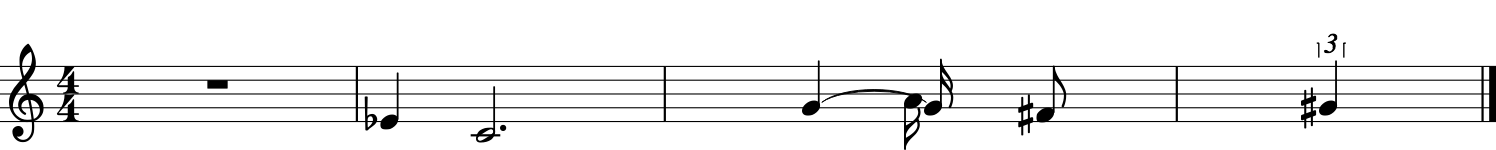

In [2]:
predict('../../Wikifonia_validation/Geron-Davis,-1983---Holy-Ground.mid', 
                lstm_model, vae_model, temperature=temperature, play_bar=8, is_4bar_model=True)

INPUT


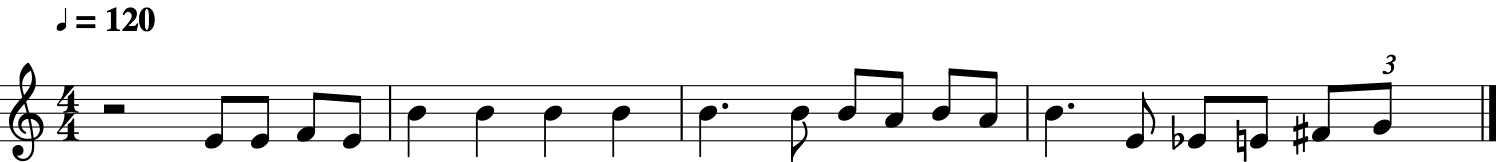

PREDICTION


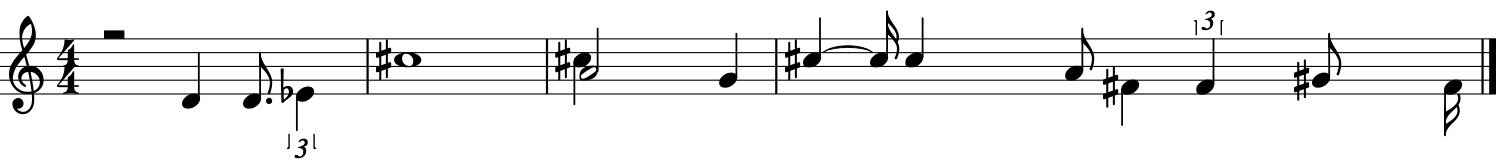

In [3]:
predict('../../Wikifonia_validation/Henry-Mancini,-Leslie-Bricusse---Two-for-the-Road.mid', 
                lstm_model, vae_model, temperature=temperature, play_bar=8, is_4bar_model=True)

INPUT


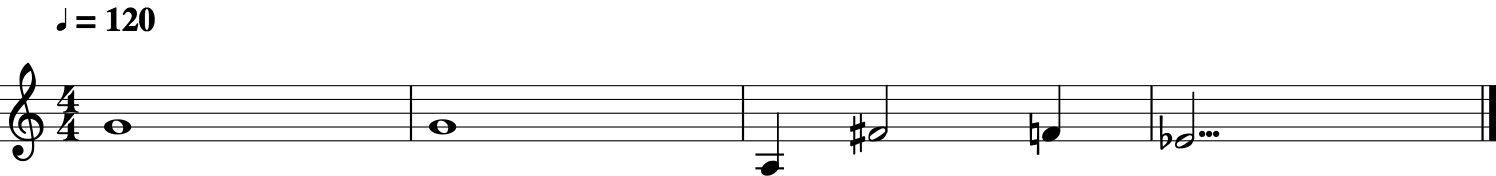

PREDICTION


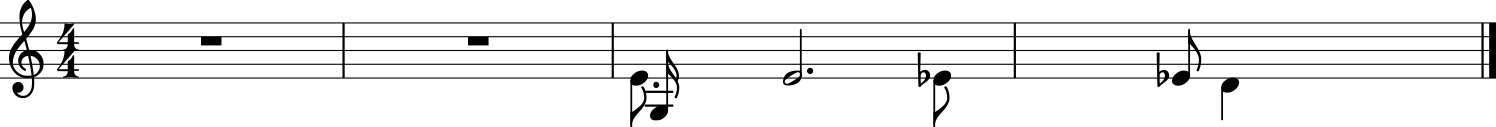

In [4]:
predict('../../Wikifonia_validation/Cole-Porter---Why-Can\'t-You-Behave.mid', 
                lstm_model, vae_model, temperature=temperature, play_bar=16, is_4bar_model=True)

INPUT


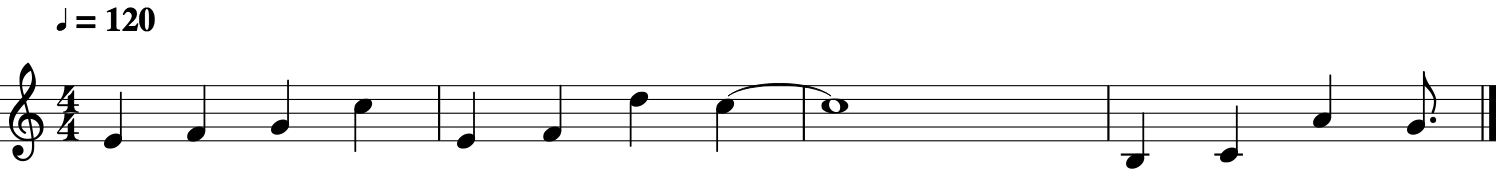

PREDICTION


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 1 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


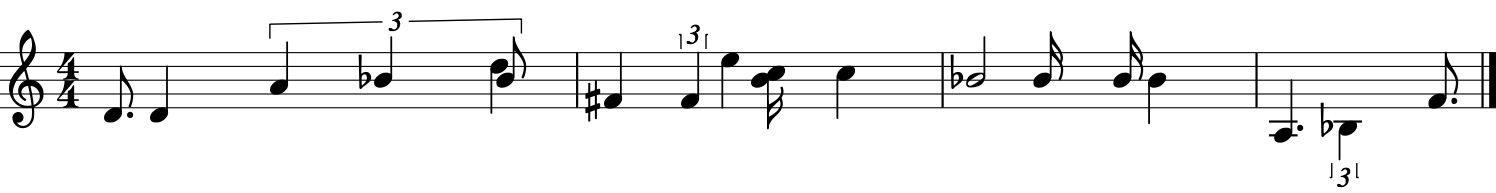

In [5]:
predict('../../Wikifonia_validation/Johnny-Mandel,-Morgan-Ames---Unless-It\'s-You.mid', 
                lstm_model, vae_model, temperature=temperature, play_bar=16, is_4bar_model=True)

INPUT


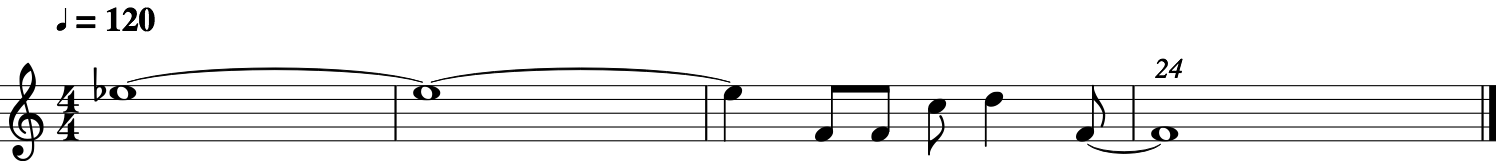

PREDICTION


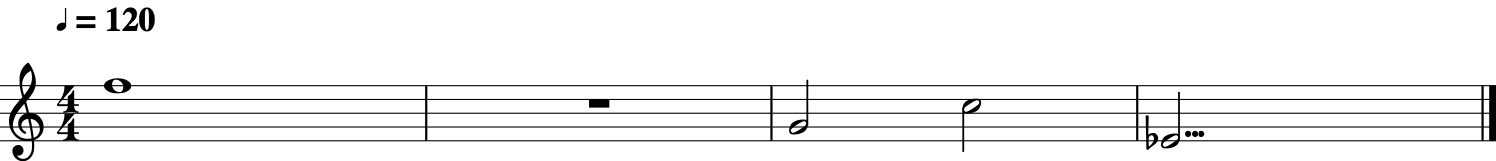

In [6]:
predict('../../Wikifonia_validation/Herbie-Hancock---Watermelon-Man.mid',
                lstm_model, vae_model, temperature=temperature, play_bar=0, is_4bar_model=True)